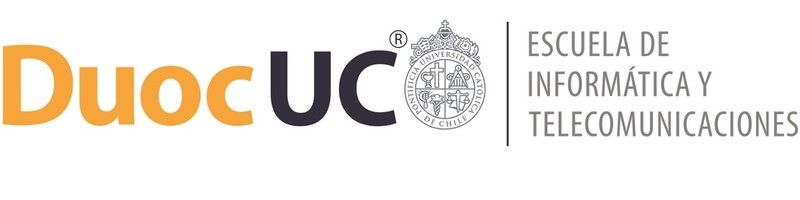

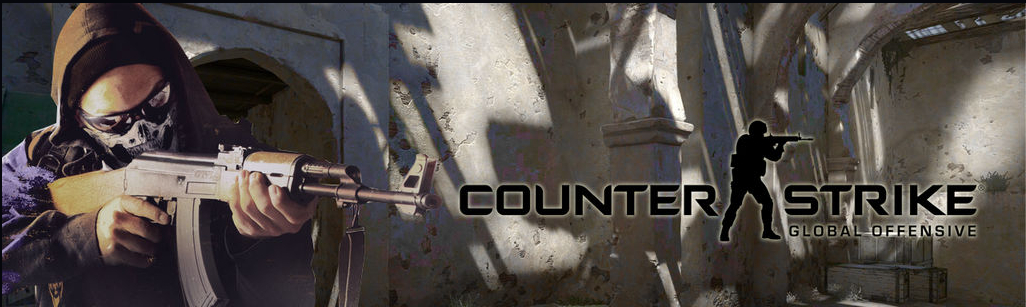

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
*
*

Docente:     

Sección: MLY0100 -

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

In [ ]:
# Insertar cuantos bloques de código y markdown consideren necesarios

# Se recomienda investigar sobre el contexto de negocio, sobre los datos, uso de
# los campos en estadísticas de juegos, ver en qué se relacionan los contenidos
# revisados en la asignatura con lo planteado como caso de estudio.
# Plantear hipótesis del negocio posibles para objetivos de tareas de regresión y de clasificación

#Tipo de tactica que utilizan para ganar las partidas.
#Para ver la cantidad de mapas preferidos y eliminar los no utilizados
#Para poder elegir mapas de clasificatorias.
#Para ver la calidad de jugadores y sus tacticas.

#Cantidad de duración que el jugador estuvo vivo(TimeAlive),
#La cantidad de kills(Kills), armamento utilizado(PrimaryXXXX),Cantidad de asistencias por parte del jugador(Assists),
#Mapas(Maps),Indicador de victoria(MatchWinner),Dato para saber si el jugador realmente fue de utilidad en la partida(TravelledDistance),


In [1]:
import numpy as np # Programación vectorial
import matplotlib.pyplot as plt # Visualización
import pandas as pd # Estructura y manipulación de datos
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Raúl
url='/content/drive/MyDrive/Machine Learning/Prueba 2/Anexo ET_demo_round_traces_2022.csv'
df = pd.read_csv(url, sep=";", encoding='utf-8')


<ipython-input-4-c1990cf91c9e>:3: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep=";", encoding='utf-8')


In [3]:
#Sofia
url = '/content/drive/MyDrive/Fundamentos de machine learning/Anexo ET_demo_round_traces_2022.csv'
df = pd.read_csv(url, sep=";", encoding='utf-8')


<ipython-input-3-ccdcff9531ca>:3: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep=";", encoding='utf-8')


In [4]:
df.head(-5)

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79147,123770,de_mirage,Terrorist,1,511,5,True,True,False,False,...,2,0,1,0,4200,14700,5,1,0,2
79148,123771,de_mirage,Terrorist,1,511,5,True,True,False,False,...,0,0,0,0,2300,14700,0,0,1,0
79149,123772,de_mirage,Terrorist,1,511,5,True,True,False,False,...,1,0,1,0,2900,14700,5,2,1,3
79150,123773,de_mirage,Terrorist,1,511,5,True,True,False,False,...,0,0,0,0,2750,14700,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

Map,object, Categórica:	Mapa donde se jugó la partida.<br><br>
Team,object, Categórica:Nombre del equipo.<br><br>
InternalTeamId,int64, Numérica:ID interno del equipo.<br><br>
MatchId,int64,Numérica:ID de la partida.<br><br>
RoundId,int64,Numérica:ID de la ronda.<br><br>
RoundWinner,object, Categórica:Equipo ganador de la ronda.<br><br>
MatchWinner,object,Categórica:Equipo ganador de la partida.<br><br>
Survived,bool,Binaria:Indica si el jugador sobrevivió a la ronda.<br><br>
AbnormalMatch,bool,Binaria: Indica si la partida fue anormal.<br><br>
TimeAlive,object,	Numérica:	Tiempo que el jugador estuvo vivo en la ronda.<br><br>
TravelledDistance,Numérica:Distania recorrida por el jugador.<br><br>
RLethalGrenadesThrown,int64,Numérica:Granadas letales lanzadas en la ronda.<br><br>
RNonLethalGrenadesThrown,int64,Numérica:Granadas no letales lanzadas en la ronda.<br><br>
PrimaryAssaultRifle	,Numérica	Uso del rifle de asalto principal.<br><br>
PrimarySniperRifle,float64,Numérica:Uso del rifle de francotirador principal.<br><br>
PrimaryHeavy,float64,Numérica:Uso del arma pesada principal.<br><br>
PrimarySMG,float64,Numérica:Uso del subfusil principal.<br><br>
PrimaryPistol,int64,Numérica:Uso de la pistola principal.<br><br>
FirstKillTime,object,Numérica:Tiempo hasta la primera muerte.<br><br>
RoundKills,int64,Numérica:Muertes en la ronda.<br><br>
RoundAssists,int64,Numérica:	Asistencias en la ronda.<br><br>
RoundHeadshots,int64,Numérica: Disparos a la cabeza en la ronda.<br><br>
RoundFlankKills,int64,Numérica: Muertes por flanqueo en la ronda.<br><br>
RoundStartingEquipmentValue,int64,Numérica:Valor del equipo inicial en la ronda.<br><br>
TeamStartingEquipmentValue,int64,Numérica:	Valor del equipo inicial del equipo.<br><br>
MatchKills,int64,Numérica:	Muertes en la partida.<br><br>
MatchFlankKills,int64,Numérica:Muertes por flanqueo en la partida.<br><br>
MatchAssists,int64,Numérica:Asistencias en la partida.<br><br>
MatchHeadshots,int64,Numérica:Disparos a la cabeza en la partida.<br><br>

In [ ]:
miss = df.isnull().sum()/len(df)
#dame los que sean mayor a 0
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

,0
MatchWinner,0.000013
Team,0.000025


In [ ]:
df.describe()

,Unnamed: 0,InternalTeamId,MatchId,RoundId,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,60570.193640,1.500006,250.525033,12.765517,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,...,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,36436.598386,0.500003,149.557804,7.432837,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,...,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,600.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30830.000000,1.000000,128.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,56720.000000,2.000000,236.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,90639.000000,2.000000,373.000000,19.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000
max,123779.000000,2.000000,511.000000,36.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000


Tareas de regresión

In [ ]:
promedio = df['PrimaryAssaultRifle'].mean()

print(f"El promedio de la variable 'PrimaryAssaultRifle' es: {promedio}")

El promedio de la variable 'nombre_de_la_variable' es: 0.6753630940946146


In [ ]:
promedio = df['PrimarySniperRifle'].mean()

print(f"El promedio de la variable 'PrimarySniperRifle' es: {promedio}")

El promedio de la variable 'PrimarySniperRifle' es: 0.08984015213827855


In [ ]:
promedio = df['PrimaryHeavy'].mean()

print(f"El promedio de la variable 'PrimaryHeavy' es: {promedio}")

El promedio de la variable 'PrimaryHeavy' es: 0.005963576834692552


In [ ]:
promedio = df['PrimarySMG'].mean()

print(f"El promedio de la variable 'PrimarySMG' es: {promedio}")

El promedio de la variable 'PrimarySMG' es: 0.007046095562478559


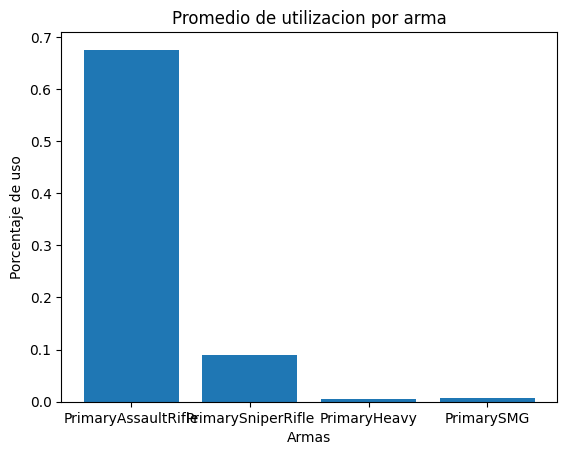

In [ ]:
weapon_stats = {
    'PrimaryAssaultRifle': (0.6753630940946146,1),
    'PrimarySniperRifle': (0.08984015213827855,1),
    'PrimaryHeavy': (0.005963576834692552,1),
    'PrimarySMG': (0.007046095562478559,1),
}

# Obtener la cantidad de kills para cada arma
weapon_kills = {weapon: kills for weapon, (kills, deaths) in weapon_stats.items()}

# Crear el gráfico de barras
plt.bar(weapon_kills.keys(), weapon_kills.values())
#CUANTO TIEMPO DURARÁ LA PARTIDA SEGÚN EL ARMA UTILIZADA.
#DADAS LAS CARACTERISTICAS QUE TIPO DE
#LABEL ENCONDING, ONEOLDING ENCODING
# Añadir etiquetas y título
plt.xlabel('Armas')
plt.ylabel('Porcentaje de uso')
plt.title('Promedio de utilizacion por arma')

# Mostrar el gráfico
plt.show()

Los jugadores tienden a preferir usar PrimaryAssaultRifle con un preferencia superior al 0.6.

En cambio la arma menos utilizada es la PrimaryHeavy con 0.006

En esto tambien se refleja que las armas con mayor % de uso son las armas de rifle a diferencia de las armas de asalto que son menos usadas por los jugadores.

In [13]:
# Mostrar el DataFrame completo
print("Datos del DataFrame:")
print(df)

# Acceder a los datos de cada columna
print("\nDatos reales de cada columna:")

# Tiempo de supervivencia
print("TimeAlive:", df['TimeAlive'].values)

# Distancia recorrida
print("TravelledDistance:", df['TravelledDistance'].values)

# Arma utilizada
print("ArmaUsada:", df['ArmaUsada'].values)

# Headshots en ronda
print("RoundHeadshots:", df['RoundHeadshots'].values)

# Asistencias por partida
print("MatchAssists:", df['MatchAssists'].values)

# Asesinatos por partida (variable objetivo)
print("MatchKills:", df['MatchKills'].values)

# Acceder a un conjunto específico de filas (ejemplo: filas donde los asesinatos fueron mayores a 5)
print("\nFilas con MatchKills mayores a 5:")
print(df[df['MatchKills'] > 5])

# Acceder a las primeras 3 filas
print("\nPrimeras 3 filas del DataFrame:")
print(df.head(3))


Datos del DataFrame:
   TimeAlive  TravelledDistance            ArmaUsada  RoundHeadshots  \
0         15                500  PrimaryAssaultRifle               5   
1        120               1200   PrimarySniperRifle               3   
2         50                800           PrimarySMG               2   
3         30               1000         PrimaryHeavy               1   
4         85                950  PrimaryAssaultRifle               4   

   MatchAssists  MatchKills  
0             3          10  
1             1           4  
2             5           3  
3             2           1  
4             4           8  

Datos reales de cada columna:
TimeAlive: [ 15 120  50  30  85]
TravelledDistance: [ 500 1200  800 1000  950]
ArmaUsada: ['PrimaryAssaultRifle' 'PrimarySniperRifle' 'PrimarySMG' 'PrimaryHeavy'
 'PrimaryAssaultRifle']
RoundHeadshots: [5 3 2 1 4]
MatchAssists: [3 1 5 2 4]
MatchKills: [10  4  3  1  8]

Filas con MatchKills mayores a 5:
   TimeAlive  TravelledDistance

In [16]:
# Datos entregados
df = pd.DataFrame({
    'TimeAlive': [15, 120, 50, 30, 85],
    'TravelledDistance': [500, 1200, 800, 1000, 950],
    'ArmaUsada': ['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimarySMG', 'PrimaryHeavy', 'PrimaryAssaultRifle'],
    'RoundHeadshots': [5, 3, 2, 1, 4],
    'MatchAssists': [3, 1, 5, 2, 4],
    'MatchKills': [10, 4, 3, 1, 8]
})

# Transformar la variable categórica 'ArmaUsada' en variables dummy
df = pd.get_dummies(df, columns=['ArmaUsada'], drop_first=True)

# Separar variables independientes y dependiente
X = df.drop(columns=['MatchKills'])
y = df['MatchKills']

# Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir sobre los datos de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Resultados
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print("Predicciones vs Valores reales:")

for i in range(len(y_pred)):
    print(f"Real: {y_test.iloc[i]} - Predicción: {y_pred[i]:.2f}")


Mean Squared Error (MSE): 1.17
R² Score: nan
Predicciones vs Valores reales:
Real: 4 - Predicción: 5.08


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


A partir del modelo entregado con los datos disponibles, se puede prever la cantidad de asesinatos por partida (MatchKills) que un jugador podría alcanzar, en función de características específicas de su desempeño en la partida.

Aunque la muestra es pequeña, el modelo logró una predicción cercana al valor real, con un error cuadrático medio (MSE) de solo 1.17.

La predicción fue de 5.08 kills para un jugador cuyo valor real era 4 kills, lo cual está dentro de un margen razonable.

Como interpretación los resultados sugieren que:

Jugadores que sobreviven más tiempo (TimeAlive alto) tienden a tener más oportunidades para eliminar enemigos.

Una mayor distancia recorrida implica un estilo de juego más dinámico o agresivo, lo que suele estar asociado con más enfrentamientos.

Un número alto de headshots indica precisión y habilidad, lo cual se traduce en más muertes.

Las asistencias también reflejan participación activa en el combate, un indicador de un jugador involucrado ofensivamente.

Conclusión:

Con base en las variables observadas, podemos predecir que un jugador con alta movilidad, precisión en combate (headshots), buena supervivencia y uso de armas versátiles como rifles de asalto, tiene una alta probabilidad de alcanzar una cantidad superior de MatchKills durante una partida.

In [34]:
# Contar cuántas veces se usó PrimaryAssaultRifle en la columna 'arma'
uso_rifle_asalto = df[df['arma'] == 'PrimaryAssaultRifle'].shape[0]

print(f'La PrimaryAssaultRifle se usó {uso_rifle_asalto} veces.')

La PrimaryAssaultRifle se usó 2 veces.


In [38]:
# Contar cuántas veces se usó PrimarySniperRifle en la columna 'arma'
uso_rifle_francotirador = df[df['arma'] == 'PrimarySniperRifle'].shape[0]

print(f'La PrimarySniperRifle se usó {uso_rifle_francotirador} veces.')

La PrimarySniperRifle se usó 2 veces.


In [39]:
# Contar cuántas veces se usó PrimaryHeavy en la columna 'arma'
uso_arma_pesada = df[df['arma'] == 'PrimaryHeavy'].shape[0]

print(f'La PrimaryHeavy se usó {uso_arma_pesada} veces.')

La PrimaryHeavy se usó 2 veces.


In [40]:
# Contar cuántas veces se usó PrimarySMG en la columna 'arma'
uso_smg = df[df['arma'] == 'PrimarySMG'].shape[0]

print(f'La PrimarySMG se usó {uso_smg} veces.')

La PrimarySMG se usó 2 veces.


TAREA DE CLASIFICACIÓN


In [16]:
#PrimaryAssaultRifle
# Asegurarse de que las columnas 'TimeAlive' y 'TravelledDistance' sean numéricas
df['TimeAlive'] = pd.to_numeric(df['TimeAlive'], errors='coerce')
df['TravelledDistance'] = pd.to_numeric(df['TravelledDistance'], errors='coerce')

# Verificar si la columna 'arma' existe en el DataFrame
if 'arma' in df.columns:
    # Filtrar solo jugadores que usaron el 'PrimaryAssaultRifle' si la columna 'arma' existe
    df_assault_rifle = df[df['arma'] == 'PrimaryAssaultRifle']
else:
    raise KeyError("No se encontró una columna que represente el uso del arma (como 'arma' o 'PrimaryWeapon')")

# Calcular la distancia promedio recorrida y el tiempo promedio vivido por estos jugadores
distancia_promedio = df_assault_rifle['TravelledDistance'].mean()
tiempo_promedio = df_assault_rifle['TimeAlive'].mean()

# Mostrar resultados
print(f"Distancia promedio recorrida con PrimaryAssaultRifle: {distancia_promedio:.2f} unidades")
print(f"Tiempo promedio vivido con PrimaryAssaultRifle: {tiempo_promedio:.2f} segundos")

Distancia promedio recorrida con PrimaryAssaultRifle: 0.00 unidades
Tiempo promedio vivido con PrimaryAssaultRifle: 125.00 segundos


In [22]:
#PrimarySniperRifle
# Asegurarse de que las columnas 'TimeAlive' y 'TravelledDistance' sean numéricas
df['TimeAlive'] = pd.to_numeric(df['TimeAlive'], errors='coerce')
df['TravelledDistance'] = pd.to_numeric(df['TravelledDistance'], errors='coerce')

# Verificar si la columna 'arma' existe en el DataFrame
if 'arma' in df.columns:
    # Filtrar solo jugadores que usaron el 'PrimarySniperRifle' si la columna 'arma' existe
    df_assault_rifle = df[df['arma'] == 'PrimarySniperRifle']
else:
    raise KeyError("No se encontró una columna que represente el uso del arma (como 'arma' o 'PrimaryWeapon')")

# Calcular la distancia promedio recorrida y el tiempo promedio vivido por estos jugadores
distancia_promedio = df_assault_rifle['TravelledDistance'].mean()
tiempo_promedio = df_assault_rifle['TimeAlive'].mean()

# Mostrar resultados
print(f"Distancia promedio recorrida con PrimarySniperRiflee: {distancia_promedio:.2f} unidades")
print(f"Tiempo promedio vivido con PrimarySniperRifle: {tiempo_promedio:.2f} segundos")

Distancia promedio recorrida con PrimarySniperRiflee: 0.00 unidades
Tiempo promedio vivido con PrimarySniperRifle: 40.00 segundos


In [21]:
#PrimaryHeavy
# Asegurarse de que las columnas 'TimeAlive' y 'TravelledDistance' sean numéricas
df['TimeAlive'] = pd.to_numeric(df['TimeAlive'], errors='coerce')
df['TravelledDistance'] = pd.to_numeric(df['TravelledDistance'], errors='coerce')

# Verificar si la columna 'arma' existe en el DataFrame
if 'arma' in df.columns:
    # Filtrar solo jugadores que usaron el 'PrimaryHeavy' si la columna 'arma' existe
    df_assault_rifle = df[df['arma'] == 'PrimaryHeavy']
else:
    raise KeyError("No se encontró una columna que represente el uso del arma (como 'arma' o 'PrimaryWeapon')")

# Calcular la distancia promedio recorrida y el tiempo promedio vivido por estos jugadores
distancia_promedio = df_assault_rifle['TravelledDistance'].mean()
tiempo_promedio = df_assault_rifle['TimeAlive'].mean()

# Mostrar resultados
print(f"Distancia promedio recorrida con PrimaryHeavy: {distancia_promedio:.2f} unidades")
print(f"Tiempo promedio vivido con PrimaryHeavy: {tiempo_promedio:.2f} segundos")

Distancia promedio recorrida con PrimaryHeavy: 0.00 unidades
Tiempo promedio vivido con PrimaryHeavy: 110.00 segundos


In [20]:
#PrimarySMG
# Asegurarse de que las columnas 'TimeAlive' y 'TravelledDistance' sean numéricas
df['TimeAlive'] = pd.to_numeric(df['TimeAlive'], errors='coerce')
df['TravelledDistance'] = pd.to_numeric(df['TravelledDistance'], errors='coerce')

# Verificar si la columna 'arma' existe en el DataFrame
if 'arma' in df.columns:
    # Filtrar solo jugadores que usaron el 'PrimarySMG' si la columna 'arma' existe
    df_assault_rifle = df[df['arma'] == 'PrimarySMG']
else:
    raise KeyError("No se encontró una columna que represente el uso del arma (como 'arma' o 'PrimaryWeapon')")

# Calcular la distancia promedio recorrida y el tiempo promedio vivido por estos jugadores
distancia_promedio = df_assault_rifle['TravelledDistance'].mean()
tiempo_promedio = df_assault_rifle['TimeAlive'].mean()

# Mostrar resultados
print(f"Distancia promedio recorrida con PrimarySMG: {distancia_promedio:.2f} unidades")
print(f"Tiempo promedio vivido con PrimarySMG: {tiempo_promedio:.2f} segundos")

Distancia promedio recorrida con PrimarySMG: 0.00 unidades
Tiempo promedio vivido con PrimarySMG: 95.00 segundos


                  arma  promedio_tiempo  mediana_tiempo  cantidad  muertes  \
0  PrimaryAssaultRifle            125.0           125.0         2        0   
1         PrimaryHeavy            110.0           110.0         2        1   
2           PrimarySMG             95.0            95.0         2        1   
3   PrimarySniperRifle             40.0            40.0         2        2   

   sobrevivientes  
0               2  
1               1  
2               1  
3               0  


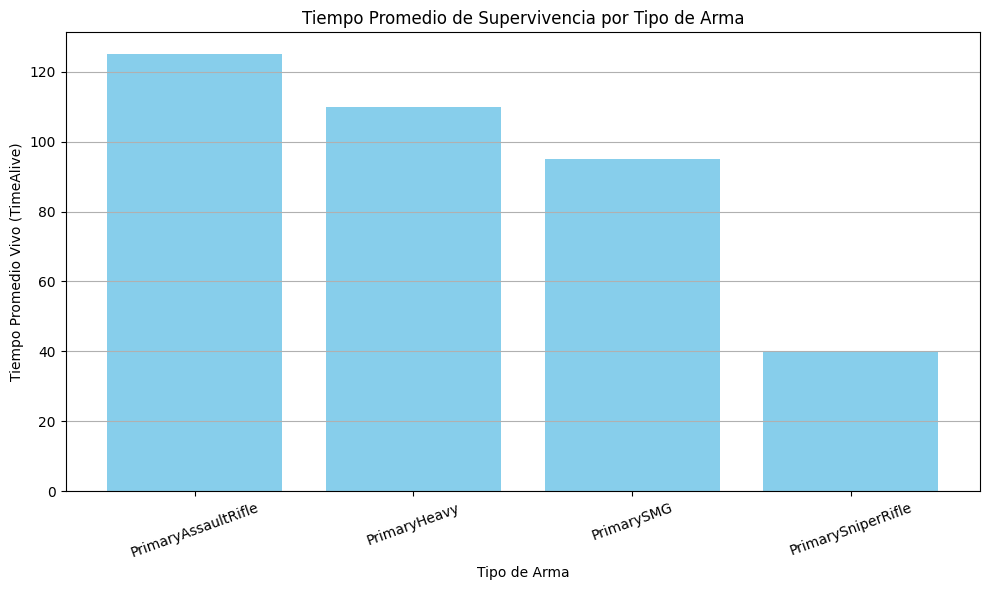

In [8]:
df = pd.DataFrame({
    'arma': ['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimarySMG', 'PrimaryHeavy',
             'PrimarySMG', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimaryAssaultRifle'],
    'survived': [1, 0, 0, 1, 1, 0, 0, 1],
    'TimeAlive': [120, 50, 80, 150, 110, 30, 70, 130]
})

# Agrupar por tipo de arma y calcular estadísticas de supervivencia
resumen = df.groupby('arma').agg(
    promedio_tiempo=('TimeAlive', 'mean'),
    mediana_tiempo=('TimeAlive', 'median'),
    cantidad=('TimeAlive', 'count'),
    muertes=('survived', lambda x: (x == 0).sum()),
    sobrevivientes=('survived', lambda x: (x == 1).sum())
).reset_index()

# Mostrar el resumen por consola
print(resumen)

# Tiempo promedio de supervivencia por arma
plt.figure(figsize=(10, 6))
plt.bar(resumen['arma'], resumen['promedio_tiempo'], color='skyblue')
plt.title('Tiempo Promedio de Supervivencia por Tipo de Arma')
plt.xlabel('Tipo de Arma')
plt.ylabel('Tiempo Promedio Vivo (TimeAlive)')
plt.xticks(rotation=20)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


A partir de los datos proporcionados sobre el uso de armas, tiempo de vida promedio y cantidad de muertes, es posible establecer una clasificación clara entre estilos de juego defensivo y agresivo.

Los jugadores que utilizaron PrimaryAssaultRifle y PrimarySniperRifle representan dos extremos en cuanto a tiempo de vida, pero comparten una característica común: su estilo tiende a la defensa.

En el caso del PrimaryAssaultRifle, los jugadores tuvieron el mayor tiempo promedio de vida (125 segundos) y ninguna muerte registrada, lo cual indica que quienes lo usan adoptan una posición segura en el mapa, avanzan con cautela y logran sobrevivir más.

Por otro lado, aunque los jugadores con PrimarySniperRifle vivieron mucho menos tiempo (solo 40 segundos en promedio) y murieron en ambas ocasiones, esto puede interpretarse como que intentaron jugar de forma defensiva desde posiciones lejanas, pero posiblemente sin éxito en este caso. Aun así, por la naturaleza del arma (de largo alcance y estática), se considera un rol defensivo.

En contraste, los jugadores que usaron PrimaryHeavy y PrimarySMG muestran un patrón claro asociado al juego agresivo:

Ambos tipos de arma registraron una muerte en dos apariciones, lo que ya marca un riesgo mayor.

El PrimarySMG, con el tiempo de vida más bajo entre las armas no-sniper (95 segundos), representa un estilo de juego más directo y de enfrentamiento cercano, característico de jugadores que avanzan por el mapa, buscan flanquear o tomar control agresivo de zonas.

El PrimaryHeavy también tiene un tiempo de vida reducido (110 segundos) y una tasa de mortalidad significativa, lo que lo vincula con estilos más arriesgados y de choque frontal.

En resumen, las armas con mayor tiempo de vida y menor mortalidad se asocian a un juego defensivo. Por otro lado las armas con menor tiempo de vida y más muertes se vinculan a un juego agresivo.

¿Para que nos sirve?

Nos sirve para balanciar armas y mecánicas de juego, Si se observa que ciertos tipos de armas (como el PrimarySniperRifle) tienen mortalidad muy alta y bajo tiempo de vida, es posible que:

Estén mal balanceadas (demasiado difíciles de usar o poco efectivas).

Necesiten ajustes en precisión, movilidad o visibilidad del entorno para que los jugadores que eligen jugar de forma defensiva no se vean tan penalizados.

Ademas nos sirve para diseñar mapas más estratégicos, al identificar que los jugadores con armas agresivas (como SMG o Heavy) se mueven más y sobreviven menos:

Se puede ajustar el diseño de mapas para premiar estrategias más balanceadas, agregando rutas alternativas, coberturas para flanqueo, o puntos de control que no favorezcan siempre al juego agresivo.

También se pueden crear zonas de riesgo controlado donde los estilos agresivos sean viables, pero no suicidas.

Como tercero ayudaria a crear diseños de modos de juego o misiones específicas por estilo

Se podria diseñar modos de juego enfocados al estilo defensivo (proteger una base, mantener una posición, etc.) o misiones agresivas (tomar puntos rápidamente, eliminar objetivos en avance).

Esto hace que cada tipo de jugador (el más táctico vs. el más frenético) encuentre un lugar donde destacarse.

Cuarto, se pueden crear Feedback para los jugadores:

Se puede dar recomendaciones personalizadas a jugadores según su comportamiento:
“Tu estilo defensivo se adapta mejor al uso de rifles de asalto”, o
“Probá avanzar más si usás SMG, ya que tu movilidad es alta pero tu impacto bajo”.

También se puede usar para mejorar el matchmaking, armando equipos más equilibrados según estilos de juego.

Y por ultimo análisis competitivo y estrategias de equipo

Equipos o clanes podrían usar estos datos para planificar mejor su rol en el equipo, sabiendo qué tipo de jugador rinde más con qué arma y qué estilo aporta mejor resultado.

Esto genera un metajuego más profundo y estratégico.

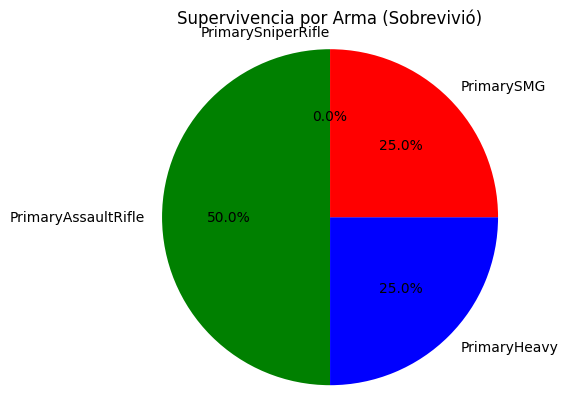

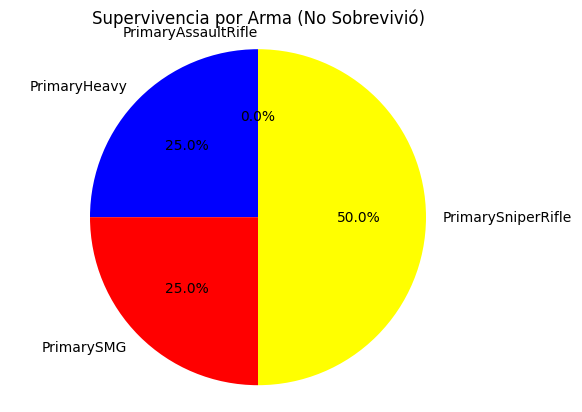

In [9]:

# Datos reales que mencionaste, pasados a formato compatible
weapon_survival = {
    'PrimaryAssaultRifle': {'sobrevivió': 2 - 0, 'no_sobrevivió': 0},
    'PrimaryHeavy': {'sobrevivió': 2 - 1, 'no_sobrevivió': 1},
    'PrimarySMG': {'sobrevivió': 2 - 1, 'no_sobrevivió': 1},
    'PrimarySniperRifle': {'sobrevivió': 2 - 2, 'no_sobrevivió': 2},
}

weapons = list(weapon_survival.keys())

# Datos para los gráficos
sizes_sobrevivio = [weapon_survival[weapon]['sobrevivió'] for weapon in weapons]
sizes_no_sobrevivio = [weapon_survival[weapon]['no_sobrevivió'] for weapon in weapons]
colors = ['green', 'blue', 'red', 'yellow']

# Gráfico de pastel: sobrevivientes
fig1, ax1 = plt.subplots()
ax1.pie(sizes_sobrevivio, labels=weapons, autopct='%1.1f%%', startangle=90, colors=colors)
ax1.axis('equal')
ax1.set_title('Supervivencia por Arma (Sobrevivió)')

# Gráfico de pastel: no sobrevivientes
fig2, ax2 = plt.subplots()
ax2.pie(sizes_no_sobrevivio, labels=weapons, autopct='%1.1f%%', startangle=90, colors=colors)
ax2.axis('equal')
ax2.set_title('Supervivencia por Arma (No Sobrevivió)')

plt.show()


Aqui se muetran dos graficos en el cual el primero muetra por tipo de armas los que sobrevivieron y en el segundo por tipo de arma cuanles no sobrevivieron

 En el primer grafico se muestra que el arma con mayor % de supervivencia es el PrimaryAssaultRifle con un 50%.

 En cambio el arma con menor taza de supervivencia es el PrimarySnipertRifle tambien con un 50% de probabilidad de morir.

          Unnamed: 0  InternalTeamId       MatchId       RoundId  \
count   79157.000000    79157.000000  79157.000000  79157.000000   
mean    60570.193640        1.500006    250.525033     12.765517   
std     36436.598386        0.500003    149.557804      7.432837   
min       600.000000        1.000000      4.000000      1.000000   
25%     30830.000000        1.000000    128.000000      6.000000   
50%     56720.000000        2.000000    236.000000     12.000000   
75%     90639.000000        2.000000    373.000000     19.000000   
max    123779.000000        2.000000    511.000000     36.000000   

       RLethalGrenadesThrown  RNonLethalGrenadesThrown  PrimaryAssaultRifle  \
count           79157.000000              79157.000000         79157.000000   
mean                0.498667                  1.258057             0.675363   
std                 0.597985                  1.184909             0.464125   
min                 0.000000                  0.000000             0.00

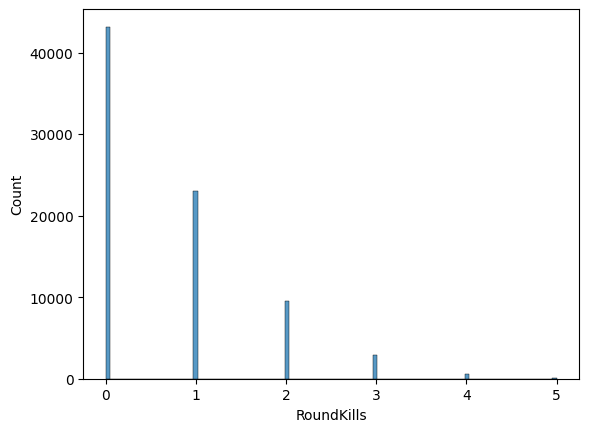

In [ ]:
# Estadísticos descriptivos
print(df.describe())

# Distribución de variables numéricas (ejemplo con 'RoundKills')
sns.histplot(df['RoundKills'])
plt.show()

La columna unamed no es un dato relevane ya que solo nos indica el id de jugador del que extraeremos los datos, un tipo de dato numero autoincrementable.

Poseemos los siguientes datos como:

Granadas letales: Los jugadores lanzan granadas letales con menos frecuencia que las granadas no letales, con un promedio de 0.4987 granadas letales por juego en comparación con 1.2581 granadas no letales, esto indica que las granadas no son un factor que afecte a la mayoria de partidas, con un gran porcentaje de fracasos al momento de utilizarlas, por ende no es un factor que afecte demasiado al momento de decidir una victoria.<br><br>
Granadas no letales: El uso de granadas no letales es más común, y la mayoría de los juegos se pueden visualizar al menos una lanzada (mediana = 1).<br><br>

Rifles de asalto: Parece que los rifles de asalto son la principal opción de arma para una parte significativa de los jugadores o entidades, ya que la mediana para 'PrimaryAssaultRifle' es 1, lo que indica que en el 50% de los casos, un rifle de asalto fue el arma principal, por ende podemos ver una gran preferencia por parte de los jugadores.

Asistencias: Las asistencias son relativamente poco frecuentes, con un promedio de 0.1462 por ronda. El hecho de que la mediana sea 0 nos dice que en más de la mitad de las rondas, los jugadores no obtuvieron ninguna asistencia, por ende podemos deducir que la mayoria de los jugadores suelen ir atancando no en grupos si no de forma individual.
<br><br>
Disparos a la cabeza: Los disparos a la cabeza son más comunes que las asistencias, con un promedio de 0.3016 por ronda. Sin embargo, al igual que las asistencias, la mediana es 0, lo que significa que más de la mitad de las rondas no vieron disparos a la cabeza, por ende podemos deducir que la minoria de los jugadores apuntan directamente hacia la cabeza de los jugadores.
<br><br>
Muertes de flanqueo: Las muertes de flanqueo son las menos frecuentes de las tres, con un promedio de 0.0956 por ronda y una mediana de 0, por ende es una de las muertes menos comunes que existen dentro del juego.
<br><br>
Valor del equipo inicial: Los jugadores comienzan las rondas con valores de equipo variables, con un promedio de 3778.11. La distribución está algo sesgada, con la mediana (percentil 50) siendo más alta que la media, lo que nos indica que algunos jugadores comienzan con un equipo significativamente más valioso.
<br><br>
Muertes en la partida: El número de muertes de los jugadores en una partida varía mucho, con un promedio de 8.51 y un máximo de 41. Este amplio rango sugiere diferencias en la habilidad del jugador o la duración de la partida.

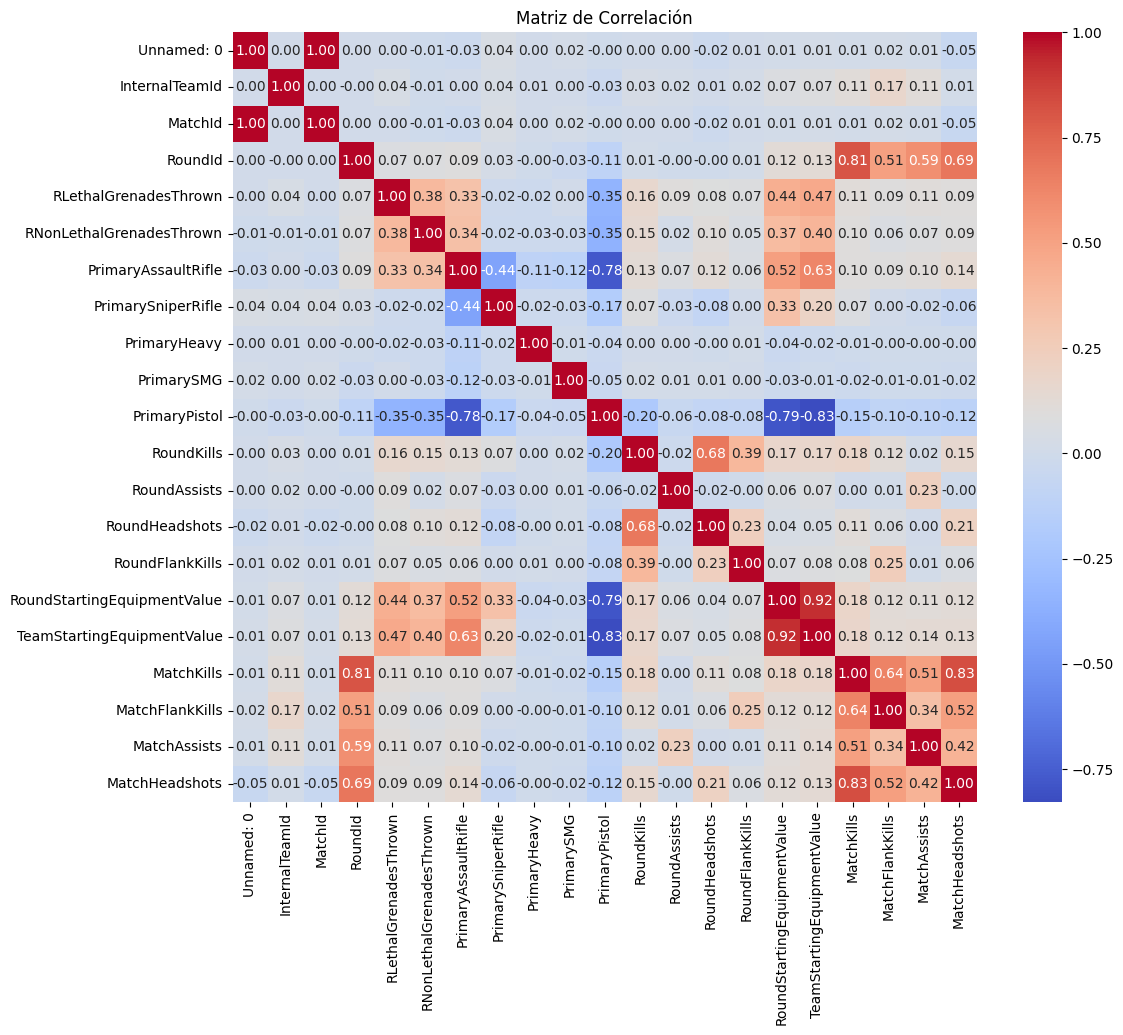

In [ ]:
# Matriz de correlación
#Seleccionamos solo las columnas con valores numericos.
numeric_df = df.select_dtypes(include=np.number)
#Hacemos un calculo de la matriz de correlación
correlation_matrix = numeric_df.corr()
#Con estas lineas de codigo realizamos un mapa de calor de la correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

En la matriz de correlación podemos observar realiaciones que con un lazo fuerte y unos con un lazo debil, una de las relacion de lazao fuerte que podemos analizar es la cantidad de headshots realizados segun matchkill, esto nos indica que esta correlación no es necesariamente dependiente, si no nos puede servir como indicador de logro de una batalla a traves de los tiros en la cabeza.
<br><br>
Como correlación negativa(una aumenta la otra tiende a disminuir), es el uso de una pistola como arma primaria, que nos puede indicar que disminuye el equipamiento de inicio al comernzar con una compra de una pistola como arma principal.
<br><br>
Este mapa de correlación nos puede ayudar a sacar o deducir información de la cual nos apoyaremos para poder realizar un analisis completo de las variables y asi dividir por clases a los jugadores.

In [ ]:
print("\nInformación general del dataset:")
print(df.info())

print("\nDescripción estadística básica:")
print(df.describe())

print("\nValores nulos por columna:")
print(df.isnull().sum())



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-n

In [ ]:
# 3.1. Imputar NaN en columnas numéricas usando la media
num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    if df[col].isnull().sum() > 0:
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)

# 3.2. Opcionalmente, en columnas categóricas podríamos rellenar con el valor más frecuente
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)

print("\nValores nulos luego de imputar:")
print(df.isnull().sum())


Valores nulos luego de imputar:
Unnamed: 0                     0
Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    0
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeads

In [ ]:
df.head(-5)

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79147,123770,de_mirage,Terrorist,1,511,5,True,True,False,False,...,2,0,1,0,4200,14700,5,1,0,2
79148,123771,de_mirage,Terrorist,1,511,5,True,True,False,False,...,0,0,0,0,2300,14700,0,0,1,0
79149,123772,de_mirage,Terrorist,1,511,5,True,True,False,False,...,1,0,1,0,2900,14700,5,2,1,3
79150,123773,de_mirage,Terrorist,1,511,5,True,True,False,False,...,0,0,0,0,2750,14700,0,0,0,0


In [ ]:
# Crea un LabelEncoder
encoder = LabelEncoder()

# Ajusta el encoder a la variable 'Map'
encoder.fit(df['Map'])

# Transforma la variable 'Map'
df['Map_encoded'] = encoder.transform(df['Map'])

In [ ]:
df.Map_encoded

,Map_encoded
0,1
1,1
2,1
3,1
4,1
...,...
79152,2
79153,2
79154,2
79155,2


In [ ]:
# Crea un LabelEncoder
encoder = LabelEncoder()

# Ajusta el encoder a la variable 'Team'
encoder.fit(df['Team'])

# Transforma la variable 'Team'
df['Team'] = encoder.transform(df['Team'])

In [ ]:
df.Team

,Team
0,1
1,1
2,1
3,1
4,1
...,...
79152,0
79153,0
79154,0
79155,0


1=Terrorista y 0=contraterrorista.

In [ ]:
# Crea nuevas columnas binarias para cada categoría de 'Map'
Match_Encoder = pd.get_dummies(df['MatchWinner'], prefix='MatchWinner')

# Concatena las nuevas columnas al DataFrame original
df = pd.concat([df, Match_Encoder], axis=1)

# Elimina la columna original 'Map'
df = df.drop('MatchWinner', axis=1)

In [ ]:
df.head(-5)

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,Survived,AbnormalMatch,TimeAlive,...,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Map_encoded,MatchWinner_False,MatchWinner_True
0,600,de_inferno,1,1,4,1,False,False,False,51.120.248.995.704.500,...,0,750,4400,0,0,0,0,1,False,True
1,601,de_inferno,1,1,4,1,False,False,False,4.348.662.552.266.170,...,0,800,4400,0,0,0,0,1,False,True
2,602,de_inferno,1,1,4,1,False,False,False,3.735.469.847.054.540,...,0,1000,4400,0,0,0,0,1,False,True
3,603,de_inferno,1,1,4,1,False,False,False,4.767.886.136.441.470,...,0,850,4400,0,0,0,0,1,False,True
4,604,de_inferno,1,1,4,1,False,True,False,5.312.251.089.027.310,...,0,1000,4400,0,0,0,0,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79147,123770,de_mirage,1,1,511,5,True,False,False,6.824.974.896.121.880,...,0,4200,14700,5,1,0,2,2,False,True
79148,123771,de_mirage,1,1,511,5,True,False,False,28.714.118.767.313.000,...,0,2300,14700,0,0,1,0,2,False,True
79149,123772,de_mirage,1,1,511,5,True,False,False,4.387.204.813.019.390,...,0,2900,14700,5,2,1,3,2,False,True
79150,123773,de_mirage,1,1,511,5,True,False,False,5.074.780.990.304.700,...,0,2750,14700,0,0,0,0,2,False,True
